In [ ]:
import pandas as pd
from IPython.display import display

path = "../data/processed/merged_titanic.parquet"

# Leer parquet
df = pd.read_parquet(path)
display(df.head(10))

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,None,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,None,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,None,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,None,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,None,S,1
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,None,S,0
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,None,Q,1
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,None,S,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,None,C,1
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,None,S,0


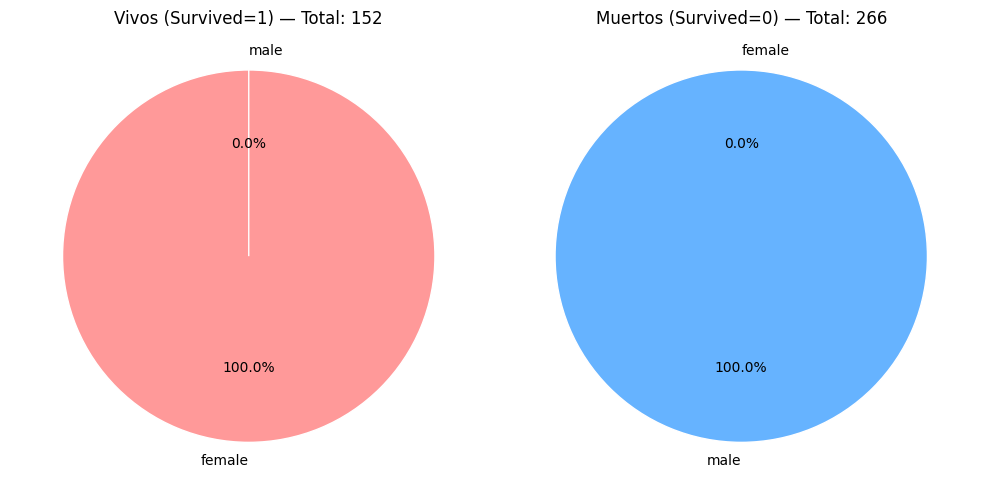

In [ ]:
import matplotlib.pyplot as plt

# Crear dataframes separados
df_vivos = df[df["Survived"] == 1]
df_muertos = df[df["Survived"] == 0]

# Contar por sexo (asegurar orden female, male)
order = ["female", "male"]
counts_vivos = df_vivos["Sex"].value_counts().reindex(order).fillna(0)
counts_muertos = df_muertos["Sex"].value_counts().reindex(order).fillna(0)

# Graficar dos pie charts lado a lado
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].pie(counts_vivos, labels=counts_vivos.index, autopct="%1.1f%%", startangle=90,
            colors=["#ff9999", "#66b3ff"], wedgeprops={"edgecolor": "w"})
axes[0].set_title(f"Vivos (Survived=1) — Total: {len(df_vivos)}")
axes[0].axis("equal")

axes[1].pie(counts_muertos, labels=counts_muertos.index, autopct="%1.1f%%", startangle=90,
            colors=["#ff9999", "#66b3ff"], wedgeprops={"edgecolor": "w"})
axes[1].set_title(f"Muertos (Survived=0) — Total: {len(df_muertos)}")
axes[1].axis("equal")

plt.tight_layout()
plt.show()


In [5]:
from pathlib import Path
save_path = "../results/subrevivientes_por_Sexo.png"
Path(save_path).parent.mkdir(parents=True, exist_ok=True)
fig.savefig(save_path, dpi=300, bbox_inches="tight")
print(f"Gráfico guardado en: {save_path}")

Gráfico guardado en: ../results/subrevivientes_por_Sexo.png
